In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

2023-12-29 12:18:14.292806: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 12:18:14.726679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 12:18:14.726781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 12:18:14.800535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 12:18:14.972234: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 12:18:16.682348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2023-12-29 12:18:29.188568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-29 12:18:29.246182: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2246 - accuracy: 0.9330 - val_loss: 0.0861 - val_accuracy: 0.9750
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0866 - accuracy: 0.9732 - val_loss: 0.0552 - val_accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0294 - val_accuracy: 0.9908


In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0527 - accuracy: 0.9833


[0.052743371576070786, 0.983299970626831]

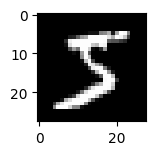

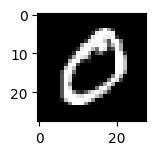

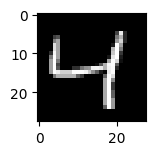

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [10]:
import os
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets


INFO:tensorflow:Assets written to: lenet_5_model/assets


['saved_model.pb', 'fingerprint.pb', 'variables', 'keras_metadata.pb', 'assets']


In [11]:
lenet_5_model.save("my.h5")

/users/jerelanc51/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [13]:
json_model = lenet_5_model.to_json()

In [14]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [15]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [16]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.13714084,  0.13486354,  0.2304422 ,  0.02280336,
           0.365985  ,  0.19064447]],

        [[-0.04342121,  0.30351105,  0.01372257,  0.2705549 ,
          -0.0875043 , -0.02204625]],

        [[-0.17906316,  0.3363505 , -0.28726694,  0.35732907,
          -0.3026746 , -0.05464843]],

        [[-0.01997118,  0.30193248,  0.1653042 ,  0.5296035 ,
          -0.36057377, -0.20056605]],

        [[-0.1659393 ,  0.43037072,  0.3046915 ,  0.2976536 ,
           0.07538134, -0.03316339]]],


       [[[-0.29163733,  0.168157  ,  0.36954522,  0.08370922,
           0.17344312,  0.17990611]],

        [[-0.1437066 ,  0.14747779,  0.7317615 ,  0.17015283,
          -0.01340501, -0.07238527]],

        [[ 0.28792575,  0.13093261,  0.7408417 ,  0.55368793,
          -0.5681005 , -0.23362015]],

        [[ 0.22234207,  0.06587148,  0.39571825,  0.5098214 ,
          -0.28846985, -0.5252179 ]],

        [[-0.07561682,  0.06418239,  0.3804396 ,  0.33028647,
          -0.04206531, -0.4

In [1]:
import h5py

def print_h5_structure(group, level=0):
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            print("  " * level + f"Group: {key}")
            print_h5_structure(group[key], level + 1)
        else:
            print("  " * level + f"Dataset: {key}")

# Chemin vers le fichier 'FashionMNIST_weights.h5'
file_path = 'FashionMNIST_weights.h5'

# Ouverture du fichier et affichage de sa structure
with h5py.File(file_path, 'r') as file:
    print(f"Structure du fichier '{file_path}':")
    print_h5_structure(file)

Structure du fichier 'FashionMNIST_weights.h5':
Group: average_pooling2d
Group: average_pooling2d_1
Group: conv2d
  Group: conv2d
    Dataset: bias:0
    Dataset: kernel:0
Group: conv2d_1
  Group: conv2d_1
    Dataset: bias:0
    Dataset: kernel:0
Group: dense
  Group: dense
    Dataset: bias:0
    Dataset: kernel:0
Group: dense_1
  Group: dense_1
    Dataset: bias:0
    Dataset: kernel:0
Group: dense_2
  Group: dense_2
    Dataset: bias:0
    Dataset: kernel:0
Group: flatten
Group: top_level_model_weights


In [9]:
import h5py

# Chemin vers le fichier HDF5 contenant les poids
file_path = 'FashionMNIST_weights.h5'

with h5py.File(file_path, 'r') as file:
    conv2d_group = file['dense/dense']
    kernel_values = conv2d_group['bias:0'][:]

    # Afficher chaque valeur avec une troncature à 8 digits et revenir à la ligne après chaque valeur
    for value in kernel_values.flatten():
        print(f"{value:.8f}")

0.12062832
-0.02616173
0.11132323
0.08578582
0.03999492
0.03269307
0.08759674
-0.01195360
0.02015924
-0.03728926
0.01268766
0.16808067
0.02583580
0.00655555
0.08373650
0.07771134
0.08610599
-0.08548454
-0.04822709
-0.02967518
-0.14999875
0.00159598
-0.06931330
-0.04590986
0.01454780
0.01004641
-0.01065788
0.05867185
-0.08101764
0.11183584
-0.01117358
0.05436333
-0.03720354
-0.01011585
-0.03132659
0.07058787
0.09933422
0.00219762
0.04446469
-0.07762651
0.09302323
0.12878504
0.01350944
-0.03052644
0.03773532
-0.00351415
-0.08447547
0.06373137
0.01924211
0.11919630
-0.07332914
0.05221489
-0.07747386
-0.00130669
-0.02524254
0.04103067
-0.07534125
0.05483909
-0.03544114
0.04144220
0.08583789
-0.06268773
0.03992786
-0.00740443
-0.09590975
-0.06468948
0.00612502
0.02787416
0.02751214
-0.02832073
0.03209975
0.10796253
-0.04779265
-0.00978532
-0.05342890
0.02049347
0.00875976
-0.05024499
0.02919422
0.05368897
0.03948538
0.04716368
-0.07211915
0.01247444
-0.01439372
-0.03890153
0.00026751
-0.053